# Group Assignment
## Members: Yang LI, Yi LIANG, Yuwen CHE, Yun LI, Xiaoyi HAO, Hemin HE

## Object Oriented Programming
### Exercise 1

In [1]:
class Tax:
    
    def __init__(self,revenue,costs):
        self.revenue,self.costs = revenue,costs
        self.brackets = [1,2,5]
        self.percent =[0.1,0.15,0.2,0.25]
        
    def set_revenue(self,revenue):
        self.revenue = revenue
    
    def set_costs(self,costs):
        self.costs = costs
    
    def set_brackets(self,brackets):
        self.brackets = brackets
        
    def set_percent(self,percent):
        self.percent = percent
    
    def compute_income(self):
        self.income = self.revenue - self.costs
        return self.income
    
    def compute_tax(self):
        self.compute_income()
        if self.income <= self.brackets[0]:
            self.tax = self.income * self.percent[0]
        elif self.income <= self.brackets[1]:
            self.tax = 1 * self.percent[0] + (self.income - 1) * self.percent[1]
        elif self.income <= self.brackets[2]:
            self.tax = 1 * (self.percent[0] + self.percent[1])+ (self.income - 2) * self.percent[2]
        else:
            self.tax = 1 * (self.percent[0] + self.percent[1] + 3 * self.percent[2]) + (self.income - 5) * self.percent[3]
        return self.tax
    
    def compute_average_tax_rate(self):
        self.compute_income()  
        self.compute_tax()
        self.average_tax_rate = round(self.tax / self.income,3)
        return self.average_tax_rate     

In [2]:
Firm_1 = Tax(105,95)
print('Income:', Firm_1.compute_income(), 'Million')
print('Tax:', Firm_1.compute_tax(), 'Million')
print('Rate:', Firm_1.compute_average_tax_rate()*100, 'Percent')

Income: 10 Million
Tax: 2.1 Million
Rate: 21.0 Percent


In [3]:
Firm_2 = Tax(13,10)
print('Income:', Firm_2.compute_income(), 'Million')
print('Tax:', Firm_2.compute_tax(), 'Million')
print('Rate:', Firm_2.compute_average_tax_rate()*100, 'Percent')

Income: 3 Million
Tax: 0.45 Million
Rate: 15.0 Percent


### Exercise 2

In [4]:
import random as rd
import numpy as np

class Roulette:
    
    def __init__(self,stash):
        self.stash = stash
        self.house_earnings = 0
        
    def add_money(self,additional):
        self.stash += additional
    
    def check_stash(self):
        print('Current stash:',self.stash)
        
    def check_house_earnings(self):
        return self.house_earnings
        
    def roll(self):
        bet_type = input('\nIf straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black.\nNotice: Wrong input would cost you 5 dollars as the fine.\nChoose bet type:') 
        
        #exception: wrong bet type
        Right_num = ['0','1','3','5','7','9','12','14','16','18','19','21','23','25','27','30','32','34','36','2','4','6','8','10','11','13','15','17','20','22','24','26','28','29','31','33','35'] # numbers can be input
        Right_sym = np.array(['O','E','R','B'])   # symbols can be input
        Right_bet = np.append( Right_num,Right_sym)
        
        if not bet_type in Right_bet:
            print('Your entry is not allowed.')
            self.stash -= 5
            self.house_earnings +=  5
            return self.check_stash()
    
        try:
            bet_amount = float(input('\nNotice: Wrong input would cost you 5% of your stash as the fine.\nChoose bet amount:') )
        except ValueError:
            print('Your entry is not allowed.')
            self.stash -= 0.05 * self.stash
            self.house_earnings +=  0.05 * self.house_earnings
            return self.check_stash()

            
        #exception: not allowed bet amount
        if bet_amount > self.stash or bet_amount <= 0:
            print('Your entry is not allowed.')
            self.stash -= 0.05 * self.stash
            self.house_earnings +=  0.05 * self.house_earnings
            return self.check_stash()


        roll_number = rd.randint(0,36) # the rolling number
        print('You rolled ',roll_number)
        
        # choice description 
        odd = np.linspace(1,35,18)
        even = np.linspace(2,36,18)
        red = [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]
        black = [2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35]
        
        
        if bet_type in ['O','E']:
            if (roll_number in odd and bet_type == 'O') or (roll_number in even and bet_type == 'E') :
                print('You win =)')
                self.stash += bet_amount 
                self.house_earnings -=  bet_amount 
                return self.check_stash()
            else:
                print('You lose =(')
                self.stash -= bet_amount 
                self.house_earnings +=  bet_amount 
                return self.check_stash()
        elif bet_type in ['R','B']:
            if (roll_number in red and bet_type == 'R') or (roll_number in black and bet_type == 'B') :
                print('You win =)')
                self.stash += bet_amount 
                self.house_earnings -=  bet_amount 
                return self.check_stash()
            else:
                print('You lose =(')
                self.stash -= bet_amount 
                self.house_earnings +=  bet_amount 
                return self.check_stash()
        else:
            if int(bet_type) == roll_number:
                print('You win =)')
                self.stash += bet_amount * 35
                self.house_earnings -=  bet_amount * 35
                return self.check_stash()
            else:
                print('You lose =(')
                self.stash -= bet_amount 
                self.house_earnings +=  bet_amount 
                return self.check_stash()
  
        
    
        

In [5]:
Player_1 = Roulette(100)
Player_1.roll()
Player_2 = Roulette(200)
Player_2.roll()
print('House earning:', Player_1.check_house_earnings()+Player_2.check_house_earnings())


If straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black.
Notice: Wrong input would cost you 5 dollars as the fine.
Choose bet type:50
Your entry is not allowed.
Current stash: 95

If straight up, just input the number between 0 and 36. O for odd, E for even. R for red, B for black.
Notice: Wrong input would cost you 5 dollars as the fine.
Choose bet type:5

Notice: Wrong input would cost you 5% of your stash as the fine.
Choose bet amount:50
You rolled  15
You lose =(
Current stash: 150.0
House earning: 55.0


### Exercise 3

In [6]:
import numpy as np

class ECDF:
    
    def __init__(self,oberservations):
        self.oberservations = np.array(oberservations)
    
    def __call__(self,x):
        return round(np.mean(self.oberservations <= x),2)

In [7]:
X = np.random.randn(1000)
F = ECDF(X)
F.__call__(0.5)

0.66000000000000003

### Exercise 4

In [8]:
import numpy as ny

class Polynomial:
    
    def __init__(self,x,coeff):
        self.x = x
        self.coeff = coeff
        
    def evaluate_polynomial(self):
        A = np.empty(len(self.coeff))
        A[0] = 1
        A[1:] = self.x
        B = np.cumprod(A)   # y = [1, x, x**2,...]
        return self.coeff @ B
    
    def evaluate_polynomial_update_coeff(self):
        C = np.linspace(0,len(self.coeff)-1,len(self.coeff))
        self.coeff = C * self.coeff
        print('New coefficient:',self.coeff)
        return self.evaluate_polynomial()

In [9]:
P1 = Polynomial(2,[1,2,3])
print('polynomial:', P1.evaluate_polynomial())
print('polynomial with new coefficient:', P1.evaluate_polynomial_update_coeff())

polynomial: 17.0
New coefficient: [ 0.  2.  6.]
polynomial with new coefficient: 28.0


In [10]:
class Polynomial:
    
    def __init__(self,x,coeff):
        self.x = x
        self.coeff = coeff
        
    def evaluate_polynomial(self):
        poly = 0
        for i in range(len(self.coeff)):
            poly += self.coeff[i] * (self.x**i)
        return poly
    
    def evaluate_polynomial_update_coeff(self):
        for i in range(len(self.coeff)):
            self.coeff[i] = i * self.coeff[i]
        print('New coefficient:',self.coeff)
        return self.evaluate_polynomial()

In [11]:
P1 = Polynomial(2,[1,2,3])
print('polynomial:', P1.evaluate_polynomial())
print('polynomial with new coefficient:', P1.evaluate_polynomial_update_coeff())

polynomial: 17
New coefficient: [0, 2, 6]
polynomial with new coefficient: 28


## Dynamic Programming
### Exercise 1

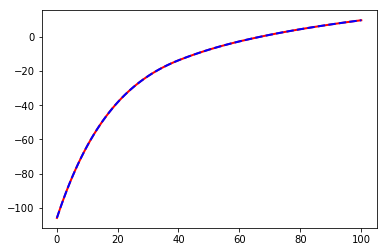

Time elapsed:  3.815217971801758


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()

beta = 0.95 
num_points = 100
tol = 10**(-5) 

w_vec = np.reshape(np.linspace(0.1,100,num_points),num_points) 
wprime = w_vec-0.005
value_old_l = np.ones(num_points) 
value_new_l = np.zeros(num_points)
value_old_h = np.ones(num_points) 
value_new_h = np.zeros(num_points)
policy_l = np.zeros(num_points)
policy_h = np.zeros(num_points)
ctr = 0

while(np.max(np.abs(value_old_l-value_new_l)) or  np.max(np.abs(value_old_h-value_new_h))> tol):
    np.copyto(value_old_l,value_new_l)
    np.copyto(value_old_h,value_new_h)
    for ii in np.arange(num_points): 
        value_new_l[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.9*beta*value_old_l[wprime<=w_vec[ii]]+0.1*beta*value_old_h[wprime<=w_vec[ii]])
        value_new_h[ii] = np.max(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.6*beta*value_old_h[wprime<=w_vec[ii]]+0.4*beta*value_old_l[wprime<=w_vec[ii]])
        policy_l[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.9*beta*value_old_l[wprime<=w_vec[ii]]+0.1*beta*value_old_h[wprime<=w_vec[ii]])
        policy_h[ii] = np.argmax(np.log(w_vec[ii]-wprime[wprime<=w_vec[ii]])+0.6*beta*value_old_h[wprime<=w_vec[ii]]+0.4*beta*value_old_l[wprime<=w_vec[ii]])
    ctr = ctr+1

plt.plot(w_vec, value_new_h, 'r-',w_vec, value_new_l, 'b--', linewidth=2)
# plt.plot(w_vec, policy_h, 'g--',w_vec, policy_l, 'y--', linewidth=2)
plt.show()

end = time.time()
print('Time elapsed: ', end-start)

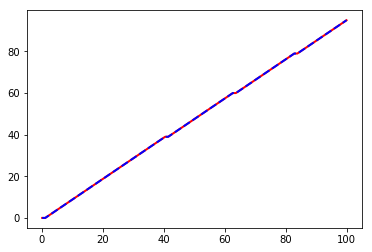

In [4]:
plt.plot(w_vec, policy_h, 'r-',w_vec, policy_l, 'b--', linewidth=2)
plt.show()

### Interpretation: Since the utility functions for high and low states share the same form, there is no essential difference between the two states in terms of their influence on consumers' choices. Therefore, the value functions and the policy functions of the two states coincide in the simulation. 